In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("G:\\研究生学习资料\\Illinois Courses\\Fall 2019\\IE 598 Machine Learning\\homework\\hw6\\ccdefault.csv",header=0)

In [2]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [3]:
df.dropna()
# df = pd.Series([5, 6, np.NaN])
df.isnull().values.any()

False

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X=df.iloc[:,:-2]
y=df['DEFAULT']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.1, random_state=42)
rf = RandomForestClassifier(n_estimators=25,
            random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [6]:
from sklearn.model_selection import cross_val_score
y_pred_train=rf.predict(X_train)
train_accuracy_score=cross_val_score(rf,X=X_train,y=y_train,cv=10,n_jobs=-1)
y_pred_test=rf.predict(X_test)
test_accuracy_score=cross_val_score(rf,X=X_test,y=y_test,cv=10,n_jobs=-1)

In [7]:
print(train_accuracy_score)

[0.80414661 0.80562755 0.82154757 0.82111111 0.81851852 0.80888889
 0.81962963 0.82030382 0.8099296  0.80029641]


In [8]:
print(test_accuracy_score)

[0.78405316 0.79333333 0.80333333 0.8        0.82666667 0.79333333
 0.82333333 0.84666667 0.83333333 0.81939799]


In [9]:
import prettytable as pt
tb = pt.PrettyTable()
tb.field_names=["1","2","3","4","5","6","7","8","9","10"]
tb.add_row(train_accuracy_score)
tb.add_row(test_accuracy_score)
tb.add_column("Dataset",["Train","Test"])
tb.float_format = "2.4"
print(tb)

+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+
|   1    |   2    |   3    |   4    |   5    |   6    |   7    |   8    |   9    |   10   | Dataset |
+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+
| 0.8041 | 0.8056 | 0.8215 | 0.8211 | 0.8185 | 0.8089 | 0.8196 | 0.8203 | 0.8099 | 0.8003 |  Train  |
| 0.7841 | 0.7933 | 0.8033 | 0.8000 | 0.8267 | 0.7933 | 0.8233 | 0.8467 | 0.8333 | 0.8194 |   Test  |
+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+


In [10]:
# n_estimators=50
rf_1 = RandomForestClassifier(n_estimators=50,
            random_state=42)
rf_1.fit(X_train, y_train)
y_pred_train=rf.predict(X_train)
train_accuracy_score=cross_val_score(rf_1,X=X_train,y=y_train,cv=10,n_jobs=-1)
y_pred_test=rf.predict(X_test)
test_accuracy_score=cross_val_score(rf_1,X=X_test,y=y_test,cv=10,n_jobs=-1)

In [11]:
tb = pt.PrettyTable()
tb.field_names=["1","2","3","4","5","6","7","8","9","10"]
tb.add_row(train_accuracy_score)
tb.add_row(test_accuracy_score)
tb.add_column("Dataset",["Train","Test"])
tb.float_format = "2.4"
print(tb)

+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+
|   1    |   2    |   3    |   4    |   5    |   6    |   7    |   8    |   9    |   10   | Dataset |
+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+
| 0.8086 | 0.8082 | 0.8290 | 0.8189 | 0.8222 | 0.8115 | 0.8204 | 0.8196 | 0.8107 | 0.8073 |  Train  |
| 0.7841 | 0.7967 | 0.8167 | 0.7967 | 0.8300 | 0.7833 | 0.8100 | 0.8467 | 0.8300 | 0.8395 |   Test  |
+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+


In [12]:
# n_estimators=75
rf_2 = RandomForestClassifier(n_estimators=75,
            random_state=42)
rf_2.fit(X_train, y_train)
y_pred_train=rf.predict(X_train)
train_accuracy_score=cross_val_score(rf_2,X=X_train,y=y_train,cv=10,n_jobs=-1)
y_pred_test=rf.predict(X_test)
test_accuracy_score=cross_val_score(rf_2,X=X_test,y=y_test,cv=10,n_jobs=-1)

In [13]:
tb = pt.PrettyTable()
tb.field_names=["1","2","3","4","5","6","7","8","9","10"]
tb.add_row(train_accuracy_score)
tb.add_row(test_accuracy_score)
tb.add_column("Dataset",["Train","Test"])
tb.float_format = "2.4"
print(tb)

+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+
|   1    |   2    |   3    |   4    |   5    |   6    |   7    |   8    |   9    |   10   | Dataset |
+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+
| 0.8108 | 0.8071 | 0.8304 | 0.8181 | 0.8256 | 0.8148 | 0.8233 | 0.8222 | 0.8129 | 0.8103 |  Train  |
| 0.7774 | 0.7867 | 0.8133 | 0.7833 | 0.8333 | 0.7900 | 0.8067 | 0.8467 | 0.8267 | 0.8328 |   Test  |
+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+


In [14]:
# n_estimators=100
rf_3 = RandomForestClassifier(n_estimators=100,
            random_state=42)
rf_3.fit(X_train, y_train)
y_pred_train=rf.predict(X_train)
train_accuracy_score=cross_val_score(rf_3,X=X_train,y=y_train,cv=10,n_jobs=-1)
y_pred_test=rf.predict(X_test)
test_accuracy_score=cross_val_score(rf_3,X=X_test,y=y_test,cv=10,n_jobs=-1)

In [15]:
tb = pt.PrettyTable()
tb.field_names=["1","2","3","4","5","6","7","8","9","10"]
tb.add_row(train_accuracy_score)
tb.add_row(test_accuracy_score)
tb.add_column("Dataset",["Train","Test"])
tb.float_format = "2.4"
print(tb)

+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+
|   1    |   2    |   3    |   4    |   5    |   6    |   7    |   8    |   9    |   10   | Dataset |
+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+
| 0.8127 | 0.8082 | 0.8301 | 0.8222 | 0.8241 | 0.8133 | 0.8244 | 0.8225 | 0.8151 | 0.8114 |  Train  |
| 0.7807 | 0.7833 | 0.8267 | 0.7967 | 0.8400 | 0.7900 | 0.8033 | 0.8467 | 0.8167 | 0.8328 |   Test  |
+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+


In [19]:
import matplotlib.pyplot as plt
feature_importances = rf.feature_importances_
feature_names = X_test.columns.get_values()
sorted_index = np.argsort(feature_importances)[::-1]

for f in range(X_test.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, sorted_index[f],  feature_names[f], feature_importances[sorted_index[f]]))

1. feature 6 ID (0.086770)
2. feature 0 LIMIT_BAL (0.075528)
3. feature 5 SEX (0.059375)
4. feature 12 EDUCATION (0.057537)
5. feature 7 MARRIAGE (0.053503)
6. feature 13 AGE (0.053107)
7. feature 1 PAY_0 (0.053006)
8. feature 14 PAY_2 (0.049681)
9. feature 16 PAY_3 (0.049601)
10. feature 18 PAY_4 (0.049143)
11. feature 20 PAY_5 (0.049046)
12. feature 15 PAY_6 (0.048917)
13. feature 17 BILL_AMT1 (0.048518)
14. feature 19 BILL_AMT2 (0.048102)
15. feature 21 BILL_AMT3 (0.042463)
16. feature 22 BILL_AMT4 (0.042181)
17. feature 8 BILL_AMT5 (0.029896)
18. feature 10 BILL_AMT6 (0.021559)
19. feature 11 PAY_AMT1 (0.020277)
20. feature 3 PAY_AMT2 (0.019697)
21. feature 9 PAY_AMT3 (0.018105)
22. feature 4 PAY_AMT4 (0.013540)
23. feature 2 PAY_AMT5 (0.010449)


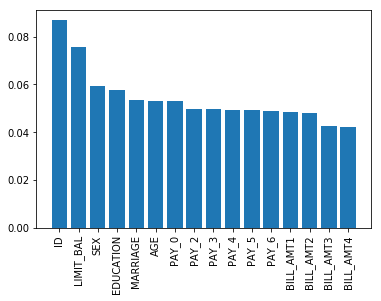

In [23]:
plt.bar(feature_names[:16], feature_importances[sorted_index[:16]])
plt.xticks(rotation=90)
plt.show()

In [24]:
print("My name is {Zihan Chen}")
print("My NetID is: {zihanc7}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is {Zihan Chen}
My NetID is: {zihanc7}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
